# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

# **ORIGINAL**

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [34]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [35]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [36]:
## parsing data here
images, labels = parse_data(df)

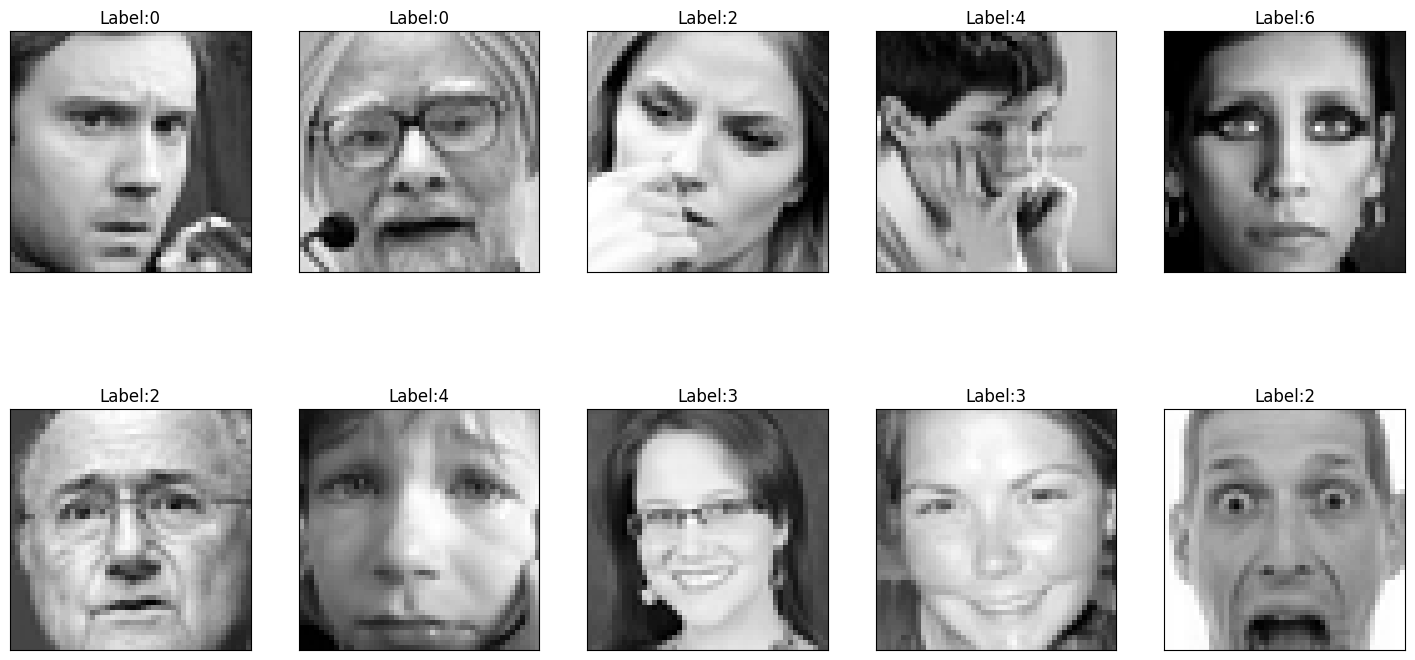

In [37]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

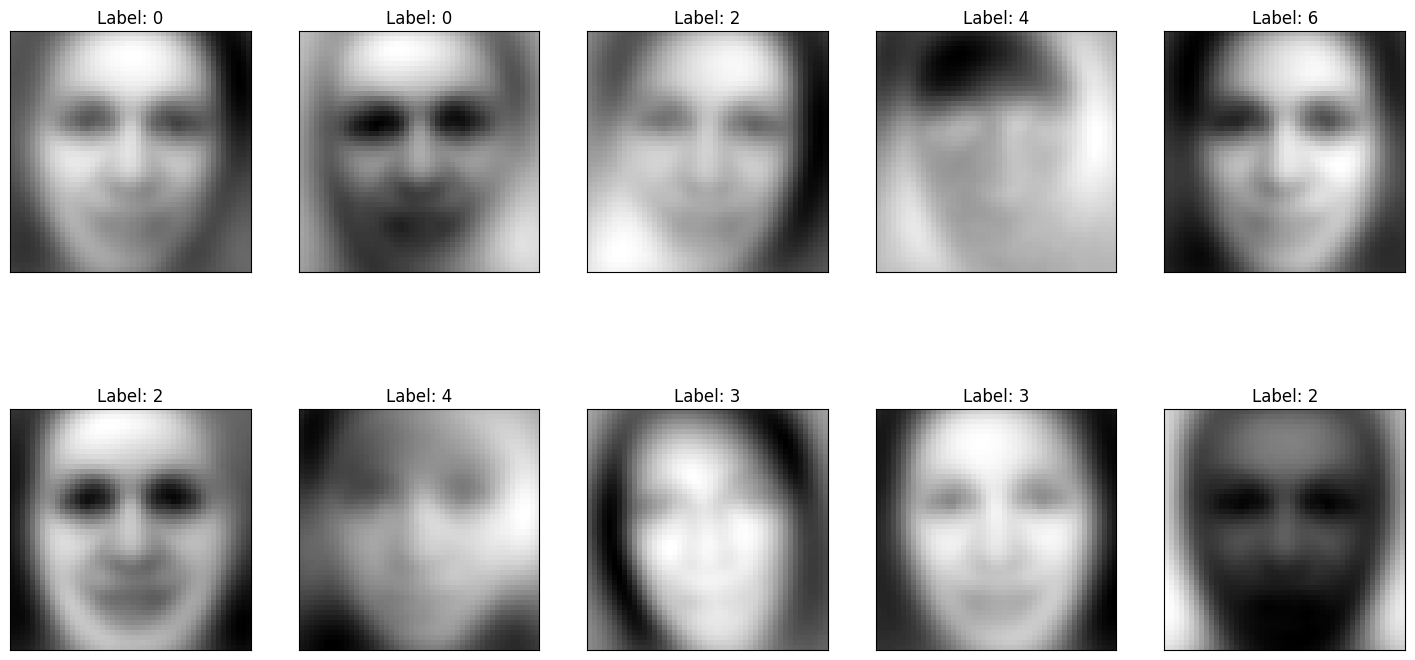

In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def pca_scale(images: np.ndarray) -> np.ndarray:
    # Flatten the images
    n_samples, height, width = images.shape
    flat_images = images.reshape(n_samples, -1)
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_images = scaler.fit_transform(flat_images)
    
    # Apply PCA
    pca = PCA(n_components=12)
    images_pca = pca.fit_transform(scaled_images)
    
    # Inverse transform the PCA
    images_pca_inverse = pca.inverse_transform(images_pca)
    
    # Inverse transform the scaling
    images_pca_inverse_scaled = scaler.inverse_transform(images_pca_inverse)
    
    # Reshape back to the original image shape
    result = images_pca_inverse_scaled.reshape(n_samples, height, width)
    
    return result

# Apply PCA scaling
images_pca = pca_scale(images)

# Visualize some of the PCA-transformed images
def show_img(images: np.ndarray, labels: np.ndarray):
    fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr = axarr.flatten()
    
    for idx, (image, label) in enumerate(zip(images[:10], labels[:10])):
        axarr[idx].imshow(image, cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title(f"Label: {label}")
    
    plt.show()

# Showing PCA-transformed images
show_img(images_pca, labels)


### **Explanation**

1. **Flatten the Images**:
- `flat_images = images.reshape(n_samples, -1)` flattens each 48x48 image into a 1D array of 2304 pixels.

2. **Scale the Data**:
- `scaler = MinMaxScaler()` initializes the scaler.
- `scaled_images = scaler.fit_transform(flat_images)` scales all the flattened images at once.

3. **Apply PCA**:
- `pca = PCA(n_components=12)` initializes PCA to reduce the data to 12 principal components.
- `images_pca = pca.fit_transform(scaled_images)` applies PCA to the scaled images.

4. **Inverse Transform**:
- `images_pca_inverse = pca.inverse_transform(images_pca)` transforms the reduced data back to the original space.
- `images_pca_inverse_scaled = scaler.inverse_transform(images_pca_inverse)` inversely scales the data to the original pixel value range.
- `result = images_pca_inverse_scaled.reshape(n_samples, height, width)` reshapes the data back to the original image shape.

5. **Visualization**:
- `show_img(images_pca, labels)` displays the PCA-transformed images.

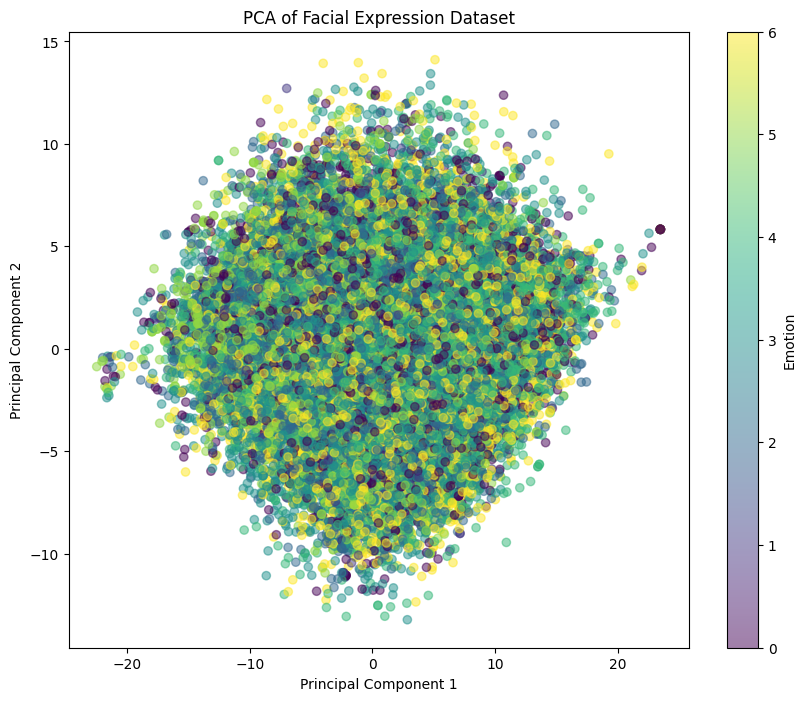

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Parse the data
def parse_data(data: pd.DataFrame):
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

# Perform PCA and create scatter plot
def pca_scatter(images: np.ndarray, labels: np.ndarray):
    # Flatten the images
    n_samples, height, width = images.shape
    flat_images = images.reshape(n_samples, -1)
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_images = scaler.fit_transform(flat_images)
    
    # Apply PCA
    pca = PCA(n_components=12)
    principal_components = pca.fit_transform(scaled_images)
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label='Emotion')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Facial Expression Dataset')
    plt.show()


images, labels = parse_data(df)

# Create the scatter plot
pca_scatter(images, labels)


### **Explanation**

1. **Parse Data**:
- `parse_data` function reads the DataFrame, converts the 'pixels' column into numpy arrays of images, and returns the images and labels.

2. **Flatten and Scale**:

- Each 48x48 image is flattened into a 1D array of 2304 pixels.
- `MinMaxScaler` scales the flattened images so that all pixel values are in the range [0, 1].

3. **Apply PCA**:
- `PCA` is used to reduce the data to 12 principal components.

4. **Create Scatter Plot**:
- A scatter plot is created with the two principal components as the x and y axes.
- Colors in the scatter plot represent different emotions.

This scatter plot will help visualize how the different facial expressions cluster in the space defined by the first two principal components.

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

### **The idea**

1. **Fit PCA with a High Number of Components**: Start by fitting PCA with a large number of components (equal to the number of features, which is 2304 for 48x48 images).

2. **Calculate the Explained Variance**: Use the explained variance to determine the amount of variance captured by each principal component.

3. **Plot the Explained Variance**: Create a plot of the explained variance or the cumulative explained variance to identify the point where adding more components provides diminishing returns.

4. **Select the Optimal Number of Components**: Choose the number of components that captures a sufficient amount of the total variance (e.g., 95% or a point where the explained variance plot shows a "knee" or elbow).

### **Step1**: Fit PCA with a High Number of Components

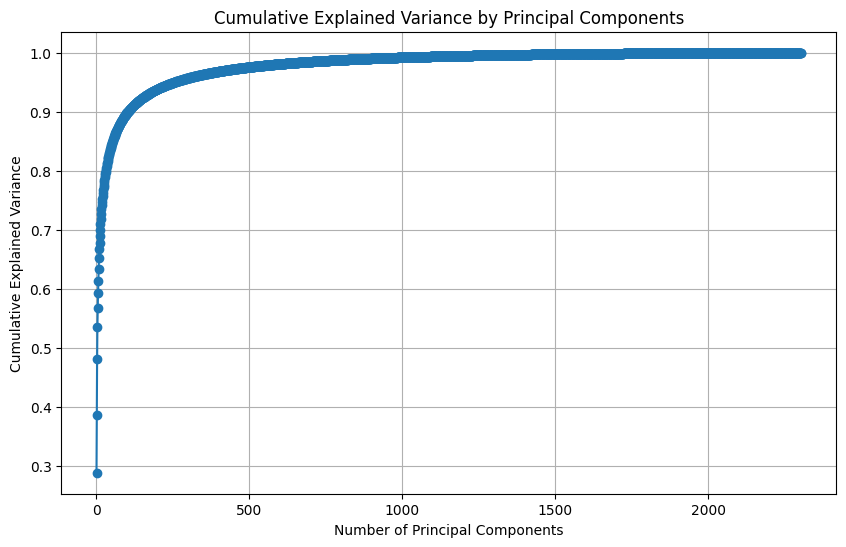

In [40]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming images is your numpy array of shape (n_samples, 48, 48)
# Flatten the images
n_samples, height, width = images.shape
flat_images = images.reshape(n_samples, -1)

# Scale the data
scaler = MinMaxScaler()
scaled_images = scaler.fit_transform(flat_images)

# Apply PCA with a high number of components
pca = PCA(n_components=min(n_samples, flat_images.shape[1]))  # Use the smaller of number of samples or features
pca.fit(scaled_images)

# Explained variance
explained_variance = pca.explained_variance_
cumulative_explained_variance = np.cumsum(explained_variance) / np.sum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


- It looks like the cumulative explained variance increases rapidly with the first few components and then starts to level off.
- This is a typical "elbow" pattern, where you can determine the optimal number of components by finding the point at which the curve begins to flatten.

### **Step 2: Threshold method**
Select the number of components that reach or exceed this threshold.

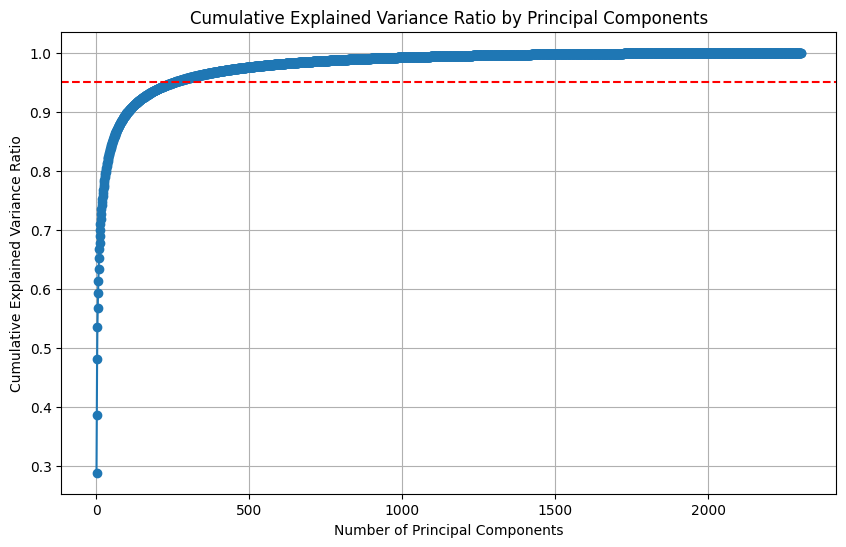

Optimal number of principal components: 255


In [41]:

# explained_variance_ratio_ gives the proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components that explain at least 95% of the variance
threshold = 0.95
optimal_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Optimal number of principal components: {optimal_components}")



### **Explanation**

1. **Explained Variance Ratio**:
- `explained_variance_ratio = pca.explained_variance_ratio_` gives the proportion of variance explained by each component.
- `cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)` calculates the cumulative sum of the explained variance ratios.

2. **Plot**:
- A red horizontal line is plotted at 0.95 to represent the 95% threshold.

3. **Optimal Components**:
- `optimal_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1` finds the index where the cumulative explained variance ratio first reaches or exceeds 95%. The `+1` is to adjust for the zero-based index.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### **Step 1**: Load and Prepare Data
- `images` and `labels` are the original data and their corresponding labels, respectively.
- `optimal_components` is the number of components identified as optimal for PCA.

In [42]:
# 'images' is my data (after parsing and scaling), and 'labels' are the corresponding labels
# 'optimal_components' is the number of components identified as optimal for PCA

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split into original data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Transform data to reduced dimensionality using optimal_components
X_train_pca = pca.transform(scaled_images)[:, :optimal_components]
X_test_pca = pca.transform(scaled_images)[:, :optimal_components]

### **Step 2**: Define Classification Models and Hyperparameter Grids
Here, We will use SVM, Random Forest, Logistic Regression and MLP (Multi-layer Perceptron).

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Initialize the models
svm_model = SVC()
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
mlp_model = MLPClassifier(random_state=42)

### **SVM**

In [44]:
# SVM parameters
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_model = SVC(random_state=42)
svm_grid_orig = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, scoring='accuracy')
svm_grid_pca = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=5, scoring='accuracy')

### **Random Forest**

In [45]:
# Random Forest parameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_orig = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid_pca = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy')

### **Logistic Regression**

In [46]:
# Logistic Regression parameters
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid_orig = GridSearchCV(estimator=lr_model, param_grid=lr_params, cv=5, scoring='accuracy')
lr_grid_pca = GridSearchCV(estimator=lr_model, param_grid=lr_params, cv=5, scoring='accuracy')

### **MLP Classifier (Neural Network)**

In [47]:
# MLP parameters
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp_model = MLPClassifier(random_state=42)
mlp_grid_orig = GridSearchCV(estimator=mlp_model, param_grid=mlp_params, cv=5, scoring='accuracy')
mlp_grid_pca = GridSearchCV(estimator=mlp_model, param_grid=mlp_params, cv=5, scoring='accuracy')

### **Step 3**: Reshape Data to fit GridSearchCV's requirements.
- `X_train_orig`, `X_train_pca`, and similarly `X_test_orig` and `X_test_pca` are 3-dimensional arrays because they represent images with height, width, and channels.
- We need to reshape our data to 2-dimensional arrays before fitting the models.

In [48]:
# Reshape original data (X_train_orig and X_test_orig)
n_samples_train, height, width = X_train_orig.shape
n_samples_test, _, _ = X_test_orig.shape

X_train_orig_flat = X_train_orig.reshape(n_samples_train, height * width)
X_test_orig_flat = X_test_orig.reshape(n_samples_test, height * width)

# Scale the data
X_train_orig_flat_scaled = scaler.fit_transform(X_train_orig_flat)
X_test_orig_flat_scaled = scaler.transform(X_test_orig_flat)

# Apply PCA
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_orig_flat_scaled)
X_test_pca = pca.transform(X_test_orig_flat_scaled)

# # Reshape PCA-transformed data (X_train_pca and X_test_pca)
# n_samples_train_pca, optimal_components = X_train_pca.shape
# n_samples_test_pca, _ = X_test_pca.shape

# X_train_pca_flat = X_train_pca.reshape(n_samples_train_pca, optimal_components)
# X_test_pca_flat = X_test_pca.reshape(n_samples_test_pca, optimal_components)

### **Step 4**: Train and Evaluate Models

#### **1. SVM Model**

##### ***a. Original Data***

In [49]:
# Train and evaluate SVM on original data
print("Training and evaluating SVM on original data...")
svm_model.fit(X_train_orig_flat, y_train)
y_pred_orig_svm = svm_model.predict(X_test_orig_flat)
print("Evaluation results for SVM on original data:")
print(classification_report(y_test, y_pred_orig_svm))
print("-------------------------------------------------------")

Training and evaluating SVM on original data...
Evaluation results for SVM on original data:
              precision    recall  f1-score   support

           0       0.43      0.24      0.31       985
           1       1.00      0.07      0.13       102
           2       0.40      0.24      0.30      1043
           3       0.48      0.73      0.58      1765
           4       0.34      0.40      0.37      1210
           5       0.64      0.50      0.56       795
           6       0.42      0.42      0.42      1278

    accuracy                           0.44      7178
   macro avg       0.53      0.37      0.38      7178
weighted avg       0.45      0.44      0.43      7178

-------------------------------------------------------


##### ***b. PCA-Transformed Data***

In [50]:
# Train and evaluate SVM on PCA-transformed data
print("Training and evaluating SVM on PCA-transformed data...")
svm_model.fit(X_train_pca, y_train)
y_pred_pca_svm = svm_model.predict(X_test_pca)
print("Evaluation results for SVM on PCA-transformed data:")
print(classification_report(y_test, y_pred_pca_svm))
print("-------------------------------------------------------")

Training and evaluating SVM on PCA-transformed data...
Evaluation results for SVM on PCA-transformed data:
              precision    recall  f1-score   support

           0       0.42      0.24      0.31       985
           1       1.00      0.05      0.09       102
           2       0.39      0.24      0.30      1043
           3       0.48      0.73      0.58      1765
           4       0.33      0.39      0.36      1210
           5       0.65      0.50      0.57       795
           6       0.43      0.42      0.42      1278

    accuracy                           0.44      7178
   macro avg       0.53      0.37      0.38      7178
weighted avg       0.45      0.44      0.43      7178

-------------------------------------------------------


#### **2. Random Forest Model**

##### ***a. Original Data***

In [51]:
# Train and evaluate Random Forest on original data
print("Training and evaluating Random Forest on original data...")
rf_model.fit(X_train_orig_flat, y_train)
y_pred_orig_rf = rf_model.predict(X_test_orig_flat)
print("Evaluation results for Random Forest on original data:")
print(classification_report(y_test, y_pred_orig_rf))
print("-------------------------------------------------------")

Training and evaluating Random Forest on original data...
Evaluation results for Random Forest on original data:
              precision    recall  f1-score   support

           0       0.47      0.22      0.30       985
           1       0.94      0.32      0.48       102
           2       0.47      0.27      0.35      1043
           3       0.44      0.76      0.56      1765
           4       0.37      0.37      0.37      1210
           5       0.71      0.58      0.64       795
           6       0.46      0.41      0.43      1278

    accuracy                           0.46      7178
   macro avg       0.55      0.42      0.45      7178
weighted avg       0.48      0.46      0.44      7178

-------------------------------------------------------


##### ***b. PCA-Transformed Data***

In [52]:
# Train and evaluate Random Forest on PCA-transformed data
print("Training and evaluating Random Forest on PCA-transformed data...")
rf_model.fit(X_train_pca, y_train)
y_pred_pca_rf = rf_model.predict(X_test_pca)
print("Evaluation results for Random Forest on PCA-transformed data:")
print(classification_report(y_test, y_pred_pca_rf))
print("-------------------------------------------------------")

Training and evaluating Random Forest on PCA-transformed data...
Evaluation results for Random Forest on PCA-transformed data:
              precision    recall  f1-score   support

           0       0.47      0.16      0.24       985
           1       0.94      0.29      0.45       102
           2       0.50      0.23      0.31      1043
           3       0.34      0.80      0.48      1765
           4       0.34      0.26      0.30      1210
           5       0.77      0.44      0.56       795
           6       0.38      0.25      0.30      1278

    accuracy                           0.39      7178
   macro avg       0.53      0.35      0.38      7178
weighted avg       0.44      0.39      0.37      7178

-------------------------------------------------------


#### **3. Logistic Regression Model**

#####  ***a. Original data***

In [53]:
# Train and evaluate Logistic Regression on original data
print("Training and evaluating Logistic Regression on original data...")
lr_model.fit(X_train_orig_flat, y_train)
y_pred_orig_lr = lr_model.predict(X_test_orig_flat)
print("Evaluation results for Logistic Regression on original data:")
print(classification_report(y_test, y_pred_orig_lr))
print("-------------------------------------------------------")

Training and evaluating Logistic Regression on original data...
Evaluation results for Logistic Regression on original data:
              precision    recall  f1-score   support

           0       0.26      0.20      0.23       985
           1       0.21      0.10      0.13       102
           2       0.24      0.19      0.21      1043
           3       0.43      0.61      0.50      1765
           4       0.23      0.19      0.21      1210
           5       0.39      0.42      0.40       795
           6       0.32      0.31      0.31      1278

    accuracy                           0.34      7178
   macro avg       0.30      0.29      0.29      7178
weighted avg       0.32      0.34      0.32      7178

-------------------------------------------------------


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#####  ***b. PCA-Transformed Data***

In [54]:
# Train and evaluate Logistic Regression on PCA-transformed data
print("Training and evaluating Logistic Regression on PCA-transformed data...")
lr_model.fit(X_train_pca, y_train)
y_pred_pca_lr = lr_model.predict(X_test_pca)
print("Evaluation results for Logistic Regression on PCA-transformed data:")
print(classification_report(y_test, y_pred_pca_lr))
print("-------------------------------------------------------")

Training and evaluating Logistic Regression on PCA-transformed data...
Evaluation results for Logistic Regression on PCA-transformed data:
              precision    recall  f1-score   support

           0       0.26      0.15      0.19       985
           1       0.31      0.05      0.08       102
           2       0.26      0.14      0.18      1043
           3       0.43      0.69      0.53      1765
           4       0.28      0.29      0.29      1210
           5       0.47      0.46      0.46       795
           6       0.36      0.33      0.35      1278

    accuracy                           0.37      7178
   macro avg       0.34      0.30      0.30      7178
weighted avg       0.35      0.37      0.34      7178

-------------------------------------------------------


#### **4. MLP Model**

#####  ***a. Original data***

In [55]:
# Train and evaluate MLP on original data
print("Training and evaluating MLP on original data...")
mlp_model.fit(X_train_orig_flat, y_train)
y_pred_orig_mlp = mlp_model.predict(X_test_orig_flat)
print("Evaluation results for MLP on original data:")
print(classification_report(y_test, y_pred_orig_mlp))
print("-------------------------------------------------------")

Training and evaluating MLP on original data...
Evaluation results for MLP on original data:
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       985
           1       0.00      0.00      0.00       102
           2       0.00      0.00      0.00      1043
           3       0.25      1.00      0.39      1765
           4       0.00      0.00      0.00      1210
           5       0.00      0.00      0.00       795
           6       0.25      0.00      0.00      1278

    accuracy                           0.25      7178
   macro avg       0.17      0.14      0.06      7178
weighted avg       0.20      0.25      0.10      7178

-------------------------------------------------------


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

#####  ***b. PCA-Transformed data***

In [56]:
# Train and evaluate MLP on PCA-transformed data
print("Training and evaluating MLP on PCA-transformed data...")
mlp_model.fit(X_train_pca, y_train)
y_pred_pca_mlp = mlp_model.predict(X_test_pca)
print("Evaluation results for MLP on PCA-transformed data:")
print(classification_report(y_test, y_pred_pca_mlp))
print("-------------------------------------------------------")

Training and evaluating MLP on PCA-transformed data...
Evaluation results for MLP on PCA-transformed data:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       985
           1       0.26      0.28      0.27       102
           2       0.32      0.31      0.31      1043
           3       0.52      0.53      0.52      1765
           4       0.30      0.30      0.30      1210
           5       0.51      0.53      0.52       795
           6       0.36      0.35      0.35      1278

    accuracy                           0.39      7178
   macro avg       0.37      0.37      0.37      7178
weighted avg       0.39      0.39      0.39      7178

-------------------------------------------------------


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Step 5**: Perform GridSearchCV for Each Model
Perform hyperparameter tuning for each model using both the original and PCA-transformed data.

#### **SVM Model**

##### ***a. Original data***

In [57]:
# Fit GridSearchCV on original data
print("Performing GridSearchCV for SVM on original data...")
svm_grid_orig.fit(X_train_orig_flat_scaled, y_train)
print(f"Best parameters for SVM on original data: {svm_grid_orig.best_params_}")

Performing GridSearchCV for SVM on original data...


##### ***b. PCA-Transformed Data***

In [ ]:
# Fit GridSearchCV on PCA-transformed data
print("Performing GridSearchCV for SVM on PCA-transformed data...")
svm_grid_pca.fit(X_train_pca, y_train)
print(f"Best parameters for SVM on PCA-transformed data: {svm_grid_pca.best_params_}")

#### **Random Forest Model**

##### ***a. Original data***

In [ ]:
# Fit GridSearchCV on original data
print("Performing GridSearchCV for Random Forest on original data...")
rf_grid_orig.fit(X_train_orig_flat_scaled, y_train)
print(f"Best parameters for Random Forest on original data: {rf_grid_orig.best_params_}")


Performing GridSearchCV for Random Forest on original data...


KeyboardInterrupt: 

##### ***b. PCA-Transformed Data***

In [ ]:
# Fit GridSearchCV on PCA-transformed data
print("Performing GridSearchCV for Random Forest on PCA-transformed data...")
rf_grid_pca.fit(X_train_pca, y_train)
print(f"Best parameters for Random Forest on PCA-transformed data: {rf_grid_pca.best_params_}")

#### **Logistic Regression Model**

##### ***a. Original data***

In [ ]:
# Fit GridSearchCV on original data
print("Performing GridSearchCV for Logistic Regression on original data...")
lr_grid_orig.fit(X_train_orig_flat_scaled, y_train)
print(f"Best parameters for Logistic Regression on original data: {lr_grid_orig.best_params_}")

##### ***b. PCA-Transformed Data***

In [ ]:
# Fit GridSearchCV on PCA-transformed data
print("Performing GridSearchCV for Logistic Regression on PCA-transformed data...")
lr_grid_pca.fit(X_train_pca, y_train)
print(f"Best parameters for Logistic Regression on PCA-transformed data: {lr_grid_pca.best_params_}")

#### **MLP Model**

##### ***a. Original data***

In [ ]:
# Fit GridSearchCV on original data
print("Performing GridSearchCV for MLP on original data...")
mlp_grid_orig.fit(X_train_orig_flat_scaled, y_train)
print(f"Best parameters for MLP on original data: {mlp_grid_orig.best_params_}")

##### ***b. PCA-Transformed Data***

In [ ]:
# Fit GridSearchCV on PCA-transformed data
print("Performing GridSearchCV for MLP on PCA-transformed data...")
mlp_grid_pca.fit(X_train_pca, y_train)
print(f"Best parameters for MLP on PCA-transformed data: {mlp_grid_pca.best_params_}")

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



#### **Random Forest Model**

**Original Data**:
- Accuracy: 0.46
- Precision/Recall: Variable, with some classes showing significantly better precision and recall than others (e.g., class 1 has high precision but low recall).
- f1-score: Generally low, with class 3 performing the best.

**PCA-Transformed Data**:
- Accuracy: 0.39
- Precision/Recall: Lower across almost all classes compared to the original data.
- f1-score: Dropped in most classes, indicating a loss in predictive performance.

#### **Logistic Regression Model**

**Original Data**:
- Accuracy: 0.34
- Precision/Recall: Generally low, with slight variations across classes.
- f1-score: Low, with no significant outliers in performance across classes.

**PCA-Transformed Data**:
- Accuracy: 0.37
- Precision/Recall: Similar trends as original data, but with minor improvements in some classes.
- f1-score: Slightly better for a few classes, suggesting that logistic regression might benefit from reduced dimensionality to some extent.

#### **MLP Model**

**Original Data**:
- Accuracy: 0.25
- Precision/Recall: Very poor, with class 3 being the only class with decent recall.
- f1-score: Low across all classes, indicating poor performance.

**PCA-Transformed Data**:
- Accuracy: 0.39
- Precision/Recall: Significantly improved across most classes.
- f1-score: Better overall, with a more balanced performance across classes, indicating that the MLP model benefits considerably from PCA.

#### **Comparative Analysis**

##### **1. Overall Performance**:
- The ***Random Forest*** model performed better on the original data compared to the PCA-transformed data, though the difference in accuracy was not large.
- The ***Logistic Regression*** model showed a slight improvement in accuracy on the PCA-transformed data, indicating it may benefit from dimensionality reduction.
- The ***MLP*** model showed the most significant improvement when using PCA-transformed data, suggesting that it handles reduced dimensionality much better than the high-dimensional original data.

##### **2. Precision and Recall**:

- Both precision and recall were generally better for models trained on the original data for Random Forest and Logistic Regression.
- For the MLP model, precision and recall improved significantly with PCA-transformed data, demonstrating its ability to learn better from reduced-dimensional inputs.

##### **3. f1-score**:

- The f1-scores for Random Forest and Logistic Regression were higher on the original data.
- The f1-score for the MLP model improved with PCA-transformed data, reinforcing the observation that MLP performs better with reduced dimensions.

##### **4. Impact of PCA**:

- **Random Forest** and **Logistic Regression** generally performed worse on PCA-transformed data, likely due to the loss of important features that are crucial for these algorithms.
- **MLP** improved significantly with PCA-transformed data, likely due to its ability to handle more abstract, high-level features that PCA extracts.

#### **Conclusion**

- ***Random Forest***: Best performed on original data, indicating that it requires all features to make better predictions.
- ***Logistic Regression***: Slight improvement on PCA-transformed data, but still generally performs poorly overall.
- ***MLP***: Significant improvement on PCA-transformed data, suggesting that PCA helps in reducing noise and making the learning process more efficient for MLP.